# Lab - 2 Assignment: Linear Regression 
---

**Submitted by:** Abhaya Shrestha \
**Roll no.:** ACE079BCT005

---

## Objective
The main objective of this assignment is to understand the complete Machine Learning (ML) pipeline by applying it step-by-step to a Linear Regression problem.

We perform two tasks:
1. Simple Linear Regression (Single Feature)
2. Multiple Linear Regression (All Features)

## Related Theory
### Linear Regression
**Linear Regression** is a supervised learning algorithm used to predict a continuous target variable based on one or more input features. It finds a **linear relationship** between the features and the target.  

- **Simple Linear Regression (SLR):** Uses one input feature to predict the target.  
  **Equation:** y = b₀ + b₁x  
  - b₀: intercept  
  - b₁: slope  
  - The model minimizes the difference between predicted and actual values using **Mean Squared Error (MSE)**.

- **Multiple Linear Regression (MLR):** Uses two or more features to predict the target.  
  **Equation:** y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ  
  Each coefficient shows the effect of that feature on the target while keeping other features constant.

**Key Idea:** Linear regression provides a simple and interpretable model to predict continuous outcomes and understand the influence of features.


## Task 1: Simple Linear Regression (Single Feature)

### 1. Data Retrieval and Collection
In this step, the dataset `housing.csv` is loaded for analysis. This dataset contains various housing related features. After loading the data, its shape, column names and sample records are examined to understand the structure and available variables. This step ensures that the dataset is correctly imported and ready for processing.

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load Dataset
df = pd.read_csv('housing.csv')

In [3]:
#Display no. of rows and columns
print('Shape:', df.shape)

Shape: (20640, 10)


In [4]:
#Display column names
print('Columns:', df.columns)


Columns: Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='str')


In [5]:
#Display top 5 rows
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 2. Data Cleaning
The dataset is checked for missing values and correct data types which ensures that it is suitable for model training. Clean data helps avoid errors during training and improves reliability of the model.

In [6]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [7]:
# Verify data types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity           str
dtype: object

### 3. Feature Design
Only one of the input variable, `housing_median_age` is selected as the independent variable, while `median_house_value` is taken as the target variable. 

In [8]:
X_simple = df[['housing_median_age']]
y = df['median_house_value']

X_simple.head(), y.head()

(   housing_median_age
 0                41.0
 1                21.0
 2                52.0
 3                52.0
 4                52.0,
 0    452600.0
 1    358500.0
 2    352100.0
 3    341300.0
 4    342200.0
 Name: median_house_value, dtype: float64)

### 4. Algorithm Selection
We select **Linear Regression**, as the goal is to predict a continuous numerical value, namely the median house value. Linear regression is suitable because it models the relationship between input features and the target variable between input features and the target variable using a linear equation.

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
model = LinearRegression()


### 5. Loss Function Selection
**Mean Squared Error(MSE)** is chosen as the loss function to evaluate model performance which measures the average of the squared differences between the predicted and actual values. 

### 6. Model Learning (Training)
The data is split into a training set and a testing set. The linear regression model is fit to the training data,  where the model learns the best fit straight line, that is, the slope and intercept values that minimize the loss function.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42)

#Train the model
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### 7. Model Evaluation
Evaluation of the trained model is carried out using the test data. Metrics such as Mean Squared Error (MSE) and R² score are used to measure the accuracy of the predictions made by the model.

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))


MSE: 13495246619.234802
R2: 0.013157717592842233


### Model Interpretation

The coefficient represents the change in median house value for a one-unit
increase in housing median age. The intercept represents the predicted house
value when the housing median age is zero.

In [12]:
print('Coefficient:', model.coef_[0])
print('Intercept:', model.intercept_)

Coefficient: 951.7605822368147
Intercept: 179409.75880973757


### Visualization of Regression Line

This plot shows the relationship between housing median age and
median house value along with the fitted regression line.


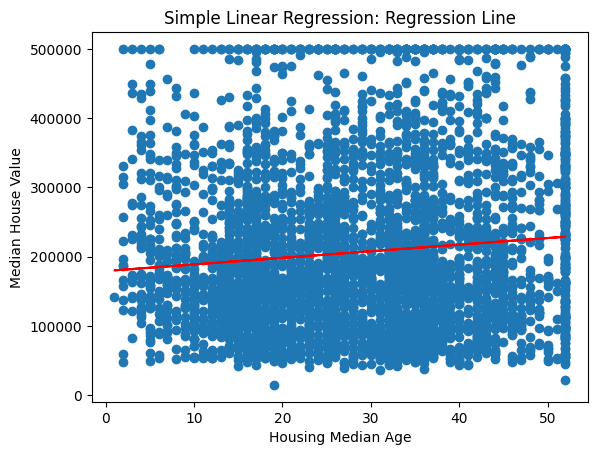

In [13]:

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.title("Simple Linear Regression: Regression Line")
plt.show()

### Visualization of Actual vs Predicted Values

This plot compares the actual median house values (`y_test`) 
against the predicted values (`y_pred`). The red diagonal line 
represents perfect prediction, where actual = predicted. 
Points close to the line indicate accurate predictions.


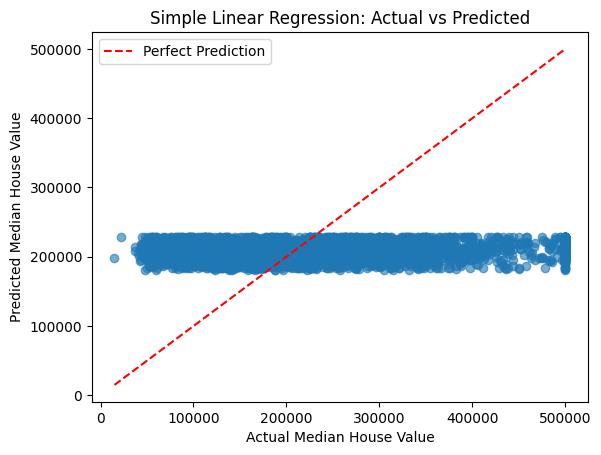

In [14]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Simple Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()


---

## Task 2: Multiple Linear Regression (All Features)

### 1. Data Retrieval and Collection

In [15]:
import pandas as pd

# Load dataset
df = pd.read_csv("housing.csv")

# Display basic information
df.shape, df.columns, df.head()


((20640, 10),
 Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
        'total_bedrooms', 'population', 'households', 'median_income',
        'median_house_value', 'ocean_proximity'],
       dtype='str'),
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                41.0        880.0           129.0   
 1    -122.22     37.86                21.0       7099.0          1106.0   
 2    -122.24     37.85                52.0       1467.0           190.0   
 3    -122.25     37.85                52.0       1274.0           235.0   
 4    -122.25     37.85                52.0       1627.0           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0       322.0       126.0         8.3252            452600.0        NEAR BAY  
 1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
 2       496.0       177.0         7.2574            352100.0        NEAR BA

### 2. Data Cleaning

In [16]:
# Check for missing values
print(df.isnull().sum())



longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [17]:
# Drop rows with missing values
df = df.dropna()

In [18]:
# Verify data types
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity           str
dtype: object

### 3. Feature Design
All features except `median_house_value` are selected as input variables, while `median_house_value` remains the target variable.

In [19]:
X_multi = df.drop('median_house_value', axis=1)
y=df['median_house_value']

#### 3.1 Feature Scaling
the main goal of feature scaling is to normalize features so they are on a similar scale. Feature scaling improves numerical stability and ensures no feature dominates due to scale differences.

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Identify numeric and categorical columns
numeric_cols = X_multi.select_dtypes(include='number').columns.tolist()
categorical_cols = X_multi.select_dtypes(include='object').columns.tolist()

# Create preprocessor
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

X_scaled = preprocessor.fit_transform(X_multi)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7280\1791977775.py:6: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = X_multi.select_dtypes(include='object').columns.tolist()


### 4. Algorithm Selection
Multiple Linear Regression is selected because the goal is to predict a continuous numerical value. The algorithm models the relationship between multiple independent variables and the target using a linear equation.

In [21]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
lr_multi = LinearRegression()


### 5. Loss Function Selection
Mean Squared Error (MSE) is used as the loss function.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

### 6. Model Training
The data set is split into training set and testing set. The model learns optimal coefficients for all the input features as well as an intercept by adjusting the loss function during training.

In [23]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

#Train the model
lr_multi.fit(X_train_m, y_train_m)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


### 7. Model Evaluation

The trained model is evaluated using the test data. 
MSE and R² score are calculated to assess the performance of the model.


In [24]:
# Predict on test set
y_pred_m = lr_multi.predict(X_test_m)

#Evaluation metrics
print('MSE:', mean_squared_error(y_test_m, y_pred_m))
print('R2:', r2_score(y_test_m, y_pred_m))

MSE: 4802173538.60416
R2: 0.6488402154431994


In [25]:
#Model Interpretation
print('Intercept:', lr_multi.intercept_)

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Create a dataframe for better visualization
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_multi.coef_
})

print('\nCoefficients with Feature Names:')
# Display as HTML table in Jupyter
from IPython.display import display, HTML
display(coefficients_df.style.set_caption("Model Coefficients").hide(axis="index"))

Intercept: 219277.54116831796

Coefficients with Feature Names:


Feature,Coefficient
num__longitude,-54313.155671
num__latitude,-54812.655941
num__housing_median_age,13615.994239
num__total_rooms,-13815.254127
num__total_bedrooms,43403.303232
num__population,-41258.829711
num__households,16493.026736
num__median_income,74596.794611
cat__ocean_proximity_INLAND,-39240.217778
cat__ocean_proximity_ISLAND,213653.374463


### Visualization: Actual vs Predicted Values

This plot compares actual median house values against predicted values. 
The red diagonal line represents perfect prediction (y_actual = y_predicted). 
Points close to the line indicate better model performance.


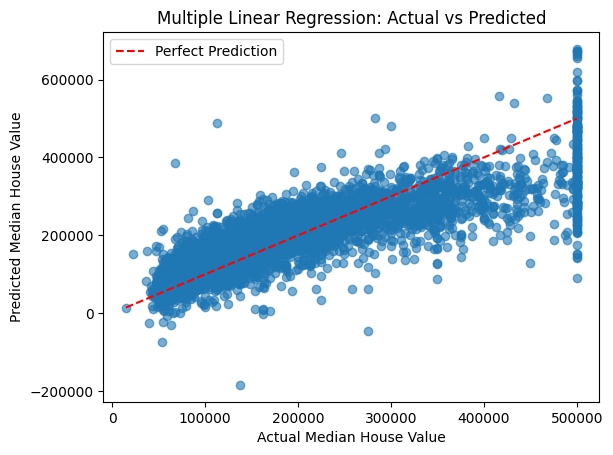

In [26]:
import matplotlib.pyplot as plt

plt.scatter(y_test_m, y_pred_m, alpha=0.6)
plt.plot([y_test_m.min(), y_test_m.max()], 
         [y_test_m.min(), y_test_m.max()], color='red', linestyle='--', label="Perfect Prediction")
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

## Model Comparison
It has been found that multiple linear regression outperforms the simple one by a greater extent. Adding relevant features dramatically improves model performance. Going from 1 to 12 features improved R² by approximately 50 times. Simple Linear Regression (Task 1) achieved an R² score of only 0.013, meaning it explains just 1.3% of the variation in house prices whereas Multiple Linear Regression (Task 2) demonstrates dramatically superior results with an R² score of 0.649, explaining nearly 65% of the price variation.

Multiple Linear Regression provides better prediction because it incorporates more information about what actually affects house prices by incorporating 12 different features. Though Single-feature models offer exceptional clarity and simplicity, they inevitably oversimplify reality. They are fundamentally inaccurate and unrealistic for real-world applications.

## Discussion and Conclusion
This lab compared between Simple Linear Regression using only housing median ages and Multiple Linear Regression using 12 features, thereby highlighting the importance of Feature Engineering in machine learning models. Simple Linear Regression achieved minimal predictive power with an R² of 0.013 (explaining only 1.3% of variance) and an average prediction error of $116,636, rendering it impractical for real-world applications. In contrast, Multiple Linear Regression dramatically outperformed it with an R² of 0.649 (explaining 64.9% of variance) and a reduced error of $69,299 — a 50-fold improvement achieved by incorporating relevant features like location, income levels, and property characteristics.

From the visualizations, it has been found that Task 1's actual vs predicted plot showed predictions frozen at a constant value, while Task 2's plot displayed predictions distributed around the diagonal line, reflecting genuine price relationships. Thus, the lab effectively demonstrates that comprehensive feature selection directly determines model reliability and business applicability—a fundamental principle showing that relevant features matter far more than model simplicity.